In [27]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.interpolate import RegularGridInterpolator
from scipy.integrate import solve_ivp


In [31]:
# Setup
input_dir = 'vortex/'
dt = 10  # time step size
t_final = 100  # end time
num_steps = 10

# Load grid (assuming x and y are static)
x = np.genfromtxt(input_dir + 'x.csv', delimiter=',')
y = np.genfromtxt(input_dir + 'y.csv', delimiter=',')
X, Y = np.meshgrid(x, y)

# Function to load velocity data for a given time index
def load_velocity(ti):
    u = np.genfromtxt(f'output/u{ti}.csv', delimiter=',')
    v = np.genfromtxt(f'output/v{ti}.csv', delimiter=',')
    return u, v

# Create interpolators for velocity fields
def create_interpolators(ti):
    u, v = load_velocity(ti)
    u_interp = RegularGridInterpolator((x, y), u.T)
    v_interp = RegularGridInterpolator((x, y), v.T)
    return u_interp, v_interp

# Define the ODE system
def velocity_field(t, Z):
    ti = int(t + dt)  # Convert continuous time to discrete time index
    u_interp, v_interp = create_interpolators(ti)
    X, Y = Z
    u_vel = u_interp([X, Y])[0]
    v_vel = v_interp([X, Y])[0]
    return [u_vel, v_vel]

# Initial conditions and time span
initial_positions = [[0.5, 0.5], [-0.5, 0.5], [0.5, -0.5], [-0.5,-0.5]]  # Define initial positions of particles
t_span = (0, t_final)
t_eval = np.linspace(t_span[0], t_span[1], num_steps)

# Solve the ODEs for each particle
paths = []
for pos in initial_positions:
    sol = solve_ivp(velocity_field, t_span, pos, t_eval=t_eval, method='RK45')
    paths.append(sol.y)

# Plot the results
plt.figure(figsize=(10, 6))
for path in paths:
    plt.plot(path[0, :], path[1, :], marker='o', markersize=1, linestyle='-')
    
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Tracer Particle Trajectories in Time-Varying Fluid')
plt.show()

FileNotFoundError: output/u12.csv not found.

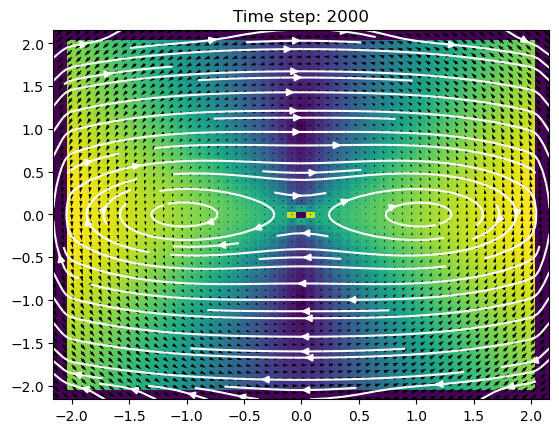

In [23]:
# Initialize variables
i_start = 0  # Start index
ie = 2000  # End index
di = 10   # Step size
input_dir = 'vortex/'
fps = 8  # Frames per second

# Create a figure and an axes
fig, ax = plt.subplots()

# Animation update function
def update(i):
    ax.clear()  # Clear the plot to draw a new frame
    # Load data
    u = np.genfromtxt(f'output/u{i}.csv', delimiter=',')
    v = np.genfromtxt(f'output/v{i}.csv', delimiter=',')
    Re = np.genfromtxt(f'output/Re{i}.csv', delimiter=',')
    p = np.genfromtxt(input_dir + 'p.csv', delimiter=',')
    gx = np.genfromtxt(input_dir + 'gx.csv', delimiter=',')
    gy = np.genfromtxt(input_dir + 'gy.csv', delimiter=',')
    X, Y = np.meshgrid(x, y)

    # Create plots
    c = ax.pcolor(x, y, Re.T, shading='auto')
    ax.streamplot(X, Y, u, v, color='w')
    ax.quiver(x, y, gx, gy)

    # Optional: Set plot limits, labels, titles
    ax.set_xlim([x.min(), x.max()])
    ax.set_ylim([y.min(), y.max()])
    ax.set_title(f"Time step: {i}")

    return c,

# Preload x, y since they do not change
x = np.genfromtxt(input_dir + 'x.csv', delimiter=',')
y = np.genfromtxt(input_dir + 'y.csv', delimiter=',')

# Create animation
ani = FuncAnimation(fig, update, frames=range(i_start, ie + 1, di), blit=True)

# Save animation
ani.save('vortex_animation.mp4', writer='ffmpeg', fps=fps)

plt.show()  # Show the plot window (optional, will not show when saving)

[[-1.23588e-02 -1.24737e-02 -1.25896e-02 ... -1.25896e-02 -1.24737e-02
  -1.23588e-02]
 [-1.20117e-02 -1.21277e-02 -1.22448e-02 ... -1.22448e-02 -1.21277e-02
  -1.20117e-02]
 [-1.16568e-02 -1.17738e-02  7.21313e+07 ...  7.21313e+07 -1.17738e-02
  -1.16568e-02]
 ...
 [ 1.16624e-02  1.17793e-02  7.21571e+07 ...  7.21571e+07  1.17793e-02
   1.16624e-02]
 [ 1.20171e-02  1.21331e-02  1.22502e-02 ...  1.22502e-02  1.21331e-02
   1.20171e-02]
 [ 1.23641e-02  1.24790e-02  1.25948e-02 ...  1.25948e-02  1.24790e-02
   1.23641e-02]]


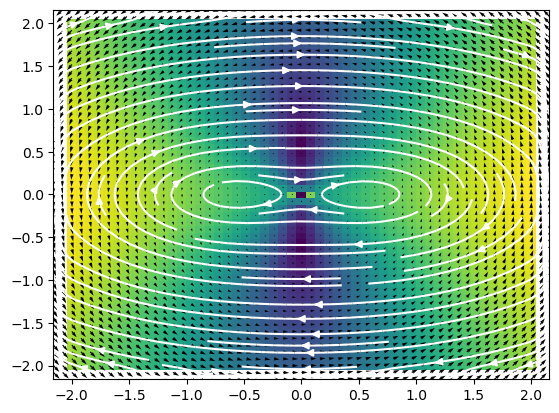

In [22]:
i = 1500
input_dir = 'vortex/'
u = np.genfromtxt('output/u'+str(i)+'.csv', delimiter=',')
v = np.genfromtxt('output/v'+str(i)+'.csv', delimiter=',')
Re = np.genfromtxt('output/Re'+str(i)+'.csv', delimiter=',')
x = np.genfromtxt(input_dir + 'x.csv', delimiter=',')
y = np.genfromtxt(input_dir + 'y.csv', delimiter=',')
p = np.genfromtxt(input_dir + 'p.csv', delimiter=',')
gx = np.genfromtxt(input_dir + 'gx.csv', delimiter=',')
gy = np.genfromtxt(input_dir + 'gy.csv', delimiter=',')

X, Y = np.meshgrid(x, y)
plt.pcolor(x[2:-2], y[2:-2], Re[2:-2,2:-2].T, shading='auto')
plt.streamplot(X, Y, u, v, color='w')
plt.quiver(x, y, gx, gy)
plt.show()